In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set()

In [5]:
df = pd.read_csv("C:/Users/kdipu/OneDrive/Desktop/MLP/archive/bank_cleaned.csv")

In [6]:
df.head()

,Unnamed: 0,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response,response_binary
0,0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,no,0
1,1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,no,0
2,2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,no,0
3,5,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,no,0
4,6,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,no,0


In [7]:
df.shape

(40841, 18)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       40841 non-null  int64  
 1   age              40841 non-null  int64  
 2   job              40841 non-null  object 
 3   marital          40841 non-null  object 
 4   education        40841 non-null  object 
 5   default          40841 non-null  object 
 6   balance          40841 non-null  int64  
 7   housing          40841 non-null  object 
 8   loan             40841 non-null  object 
 9   day              40841 non-null  int64  
 10  month            40841 non-null  object 
 11  duration         40841 non-null  float64
 12  campaign         40841 non-null  int64  
 13  pdays            40841 non-null  int64  
 14  previous         40841 non-null  int64  
 15  poutcome         40841 non-null  object 
 16  response         40841 non-null  object 
 17  response_bin

In [9]:
df.drop(['Unnamed: 0','response'], axis=1, inplace=True)

In [10]:
df.dropna()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,no,2143,yes,no,5,may,4.35,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,2.52,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,1.27,1,-1,0,unknown,0
3,35,management,married,tertiary,no,231,yes,no,5,may,2.32,1,-1,0,unknown,0
4,28,management,single,tertiary,no,447,yes,yes,5,may,3.62,1,-1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40836,25,technician,single,secondary,no,505,no,yes,17,nov,6.43,2,-1,0,unknown,1
40837,51,technician,married,tertiary,no,825,no,no,17,nov,16.28,3,-1,0,unknown,1
40838,71,retired,divorced,primary,no,1729,no,no,17,nov,7.60,2,-1,0,unknown,1
40839,72,retired,married,secondary,no,5715,no,no,17,nov,18.78,5,184,3,success,1


In [11]:
df.shape

(40841, 16)

In [12]:
duplicate_rows_df = df[df.duplicated()]
print('Number of duplicate rows:', duplicate_rows_df.shape)

Number of duplicate rows: (0, 16)


In [13]:
num_atr=['age' , 'balance' , 'day' , 'duration' , 'campaign' , 'pdays' , 'previous']

cat_atr=['job' , 'marital' , 'education' , 'default' , 'housing' , 'loan' , 'poutcome' , 'month']

In [14]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous,response_binary
age,1.000000,0.103405,-0.010549,-0.007422,0.003563,-0.005815,0.012862,0.023204
balance,0.103405,1.000000,0.008062,0.035481,-0.026482,0.017674,0.036765,0.069456
day,-0.010549,0.008062,1.000000,-0.032656,0.172387,-0.089812,-0.056279,-0.035323
duration,-0.007422,0.035481,-0.032656,1.000000,-0.081852,-0.000242,0.004824,0.400681
campaign,0.003563,-0.026482,0.172387,-0.081852,1.000000,-0.094891,-0.051522,-0.072495
pdays,-0.005815,0.017674,-0.089812,-0.000242,-0.094891,1.000000,0.567728,0.108554
previous,0.012862,0.036765,-0.056279,0.004824,-0.051522,0.567728,1.000000,0.128274
response_binary,0.023204,0.069456,-0.035323,0.400681,-0.072495,0.108554,0.128274,1.000000


In [15]:
df.job.value_counts()

blue-collar      8805
management       8565
technician       6954
admin.           4705
services         3801
retired          2020
self-employed    1443
entrepreneur     1340
unemployed       1212
housemaid        1149
student           689
other             158
Name: job, dtype: int64

In [16]:
df.education.value_counts()

secondary    21933
tertiary     12380
primary       6528
Name: education, dtype: int64

In [17]:
df.marital.value_counts()

married     24641
single      11443
divorced     4757
Name: marital, dtype: int64

In [18]:
df.default.value_counts()

no     40078
yes      763
Name: default, dtype: int64

In [19]:
df.housing.value_counts()

yes    22820
no     18021
Name: housing, dtype: int64

In [20]:
df.loan.value_counts()

no     34042
yes     6799
Name: loan, dtype: int64

In [21]:
df.response_binary.value_counts()

0    36202
1     4639
Name: response_binary, dtype: int64

In [22]:
df.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
balance              int64
housing             object
loan                object
day                  int64
month               object
duration           float64
campaign             int64
pdays                int64
previous             int64
poutcome            object
response_binary      int64
dtype: object

In [23]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome', 'response_binary'],
      dtype='object')

In [24]:
pd.crosstab(df['job'] , df['response_binary'])

response_binary,0,1
job,,
admin.,4142,563
blue-collar,8168,637
entrepreneur,1231,109
housemaid,1048,101
management,7440,1125
other,143,15
retired,1572,448
self-employed,1281,162
services,3469,332


In [25]:
pd.crosstab(df['marital'] , df['response_binary'])

response_binary,0,1
marital,,
divorced,4205,552
married,22228,2413
single,9769,1674


In [26]:
df[['balance','response_binary']].sort_values('balance', ascending = False)

,balance,response_binary
24037,10443,0
9062,10442,0
13721,10438,0
6077,10436,0
3266,10399,0
...,...,...
30290,-3058,1
1766,-3313,0
6981,-3372,0
35504,-4057,0


In [27]:
df.duration.mean()

4.308949340123857

In [28]:
df.balance.mean()

1073.9818074973678

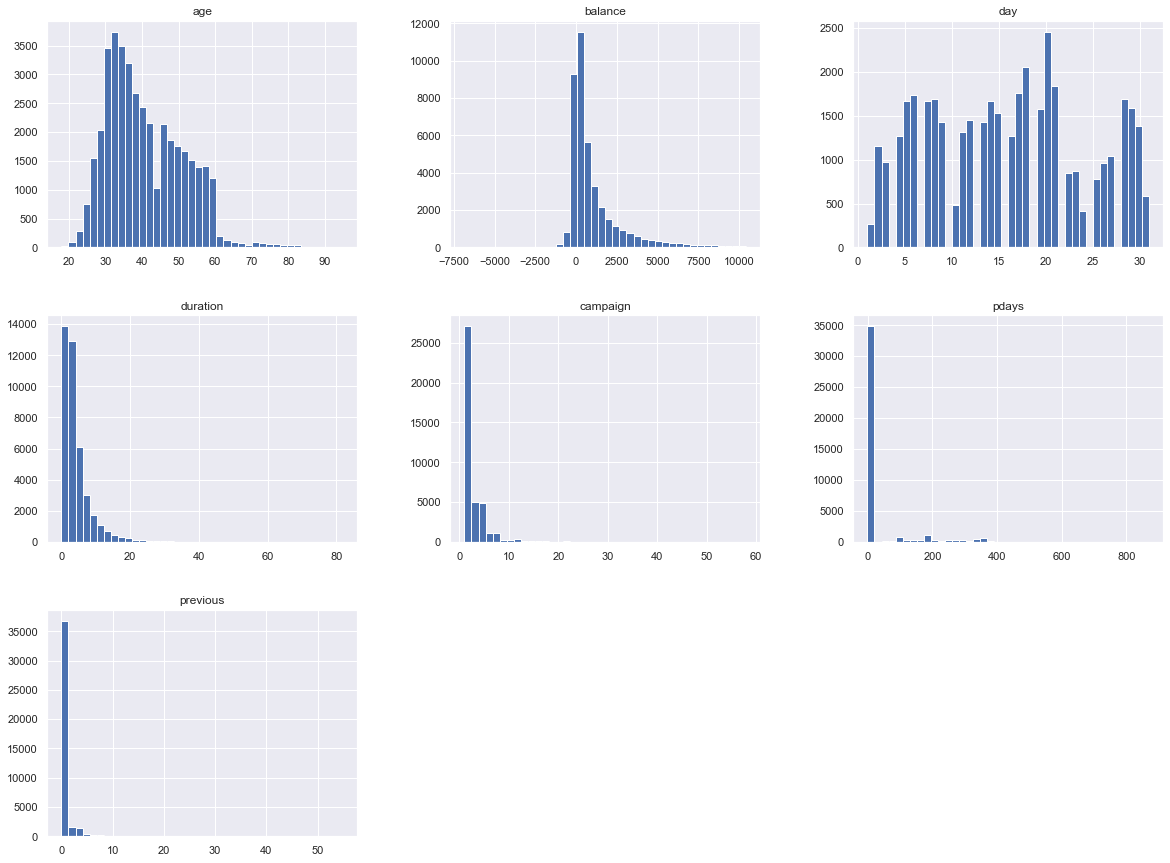

In [29]:
df[num_atr].hist(bins=40, figsize=(20,15)) 
plt.show()

<AxesSubplot:xlabel='job', ylabel='count'>

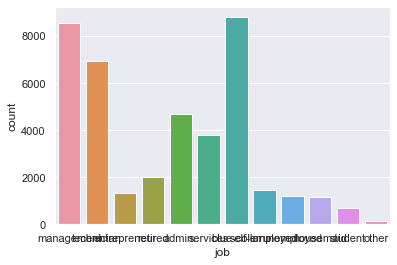

In [30]:
sns.countplot(x = 'job', data = df)

<AxesSubplot:xlabel='month', ylabel='response_binary'>

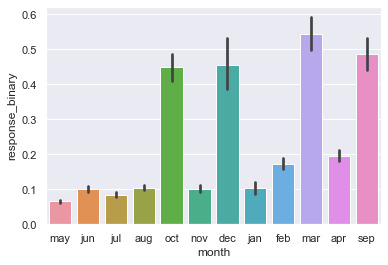

In [31]:
sns.barplot(x = 'month', y = 'response_binary', data = df)

<AxesSubplot:xlabel='response_binary', ylabel='age'>

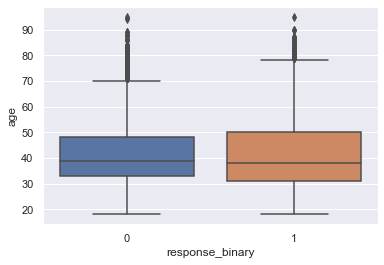

In [32]:
sns.boxplot(x = 'response_binary', y = 'age', data = df)

In [33]:
df_corr = df.corr()
df_corr

,age,balance,day,duration,campaign,pdays,previous,response_binary
age,1.000000,0.103405,-0.010549,-0.007422,0.003563,-0.005815,0.012862,0.023204
balance,0.103405,1.000000,0.008062,0.035481,-0.026482,0.017674,0.036765,0.069456
day,-0.010549,0.008062,1.000000,-0.032656,0.172387,-0.089812,-0.056279,-0.035323
duration,-0.007422,0.035481,-0.032656,1.000000,-0.081852,-0.000242,0.004824,0.400681
campaign,0.003563,-0.026482,0.172387,-0.081852,1.000000,-0.094891,-0.051522,-0.072495
pdays,-0.005815,0.017674,-0.089812,-0.000242,-0.094891,1.000000,0.567728,0.108554
previous,0.012862,0.036765,-0.056279,0.004824,-0.051522,0.567728,1.000000,0.128274
response_binary,0.023204,0.069456,-0.035323,0.400681,-0.072495,0.108554,0.128274,1.000000


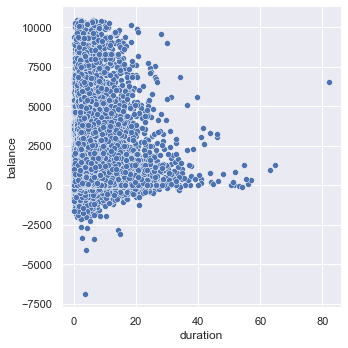

In [34]:
sns.relplot(x='duration',y='balance',kind='scatter',cmap='winter',data=df)

<AxesSubplot:>

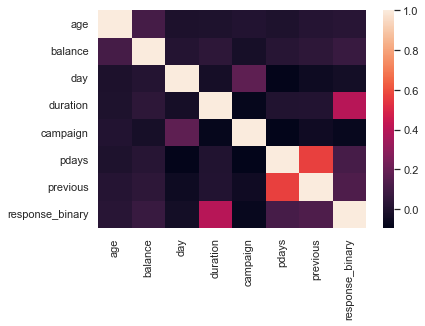

In [35]:
sns.heatmap(df_corr)

In [37]:
# KNN Classification 
from sklearn.model_selection import train_test_split
X= df.drop(['response_binary'], axis=1)
y= df['response_binary']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [40]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [41]:
X_train[cat_atr].head()

,job,marital,education,default,housing,loan,poutcome,month
8006,1,1,0,0,1,0,2,6
6900,1,1,1,0,1,1,2,8
19270,3,1,1,0,0,0,2,1
5185,8,1,1,0,0,0,2,8
4791,4,1,2,0,1,0,2,8


In [42]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.03279024, -0.42201272, -1.54203421, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.62526263,  1.59065425, ...,  0.06650842,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.00846378, -0.45764205, ..., -0.25266947,
        -0.36824873, -0.27816025],
       ...,
       [-0.27033512, -0.31627578,  0.86772615, ..., -0.25266947,
        -0.36824873, -0.27816025],
       [ 0.87334756, -0.62232549, -1.06008214, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [ 1.06396134, -0.60998952, -0.93959412, ..., -0.25266947,
         3.66926515,  0.35567087]])

In [45]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 


(28588, 15)

In [46]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean')

In [47]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(12253, 15)

In [48]:
y_pred = knn.predict(Xtr1)

In [49]:
confusion_matrix(y_test, y_pred)

array([[10557,   268],
       [ 1011,   417]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score

In [51]:
accuracy_score(y_test, y_pred)

0.8956173998204522

In [52]:
from sklearn.metrics import precision_recall_fscore_support

In [53]:
precision_recall_fscore_support(y_test, y_pred)

(array([0.91260373, 0.60875912]),
 array([0.97524249, 0.29201681]),
 array([0.94288394, 0.39469948]),
 array([10825,  1428], dtype=int64))

In [54]:
from sklearn.metrics import precision_score

In [55]:
precision_score(y_test, y_pred)

0.6087591240875913

In [56]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred)

0.2920168067226891

In [58]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.3946994794131567

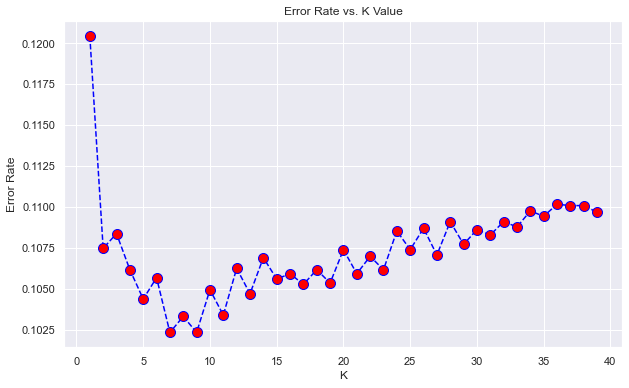

Minimum error:- 0.10234228352240271 at K = 7


In [59]:
error_rate = []
for i in range(1,40):
 knn = KNeighborsClassifier(n_neighbors=i)
 knn.fit(Xtr,y_train)
 pred_i = knn.predict(Xtr1)
 error_rate.append(1-accuracy_score(y_test, pred_i))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [60]:
knn = KNeighborsClassifier(n_neighbors=9, metric='euclidean')
knn.fit(Xtr, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=9)

In [61]:
y_pred = knn.predict(Xtr1)

In [62]:
accuracy_score(y_test, y_pred)

0.8976577164775973

In [63]:
# Decision Tree Algorithm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.datasets import load_iris

In [64]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

In [65]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [66]:
X= df.drop(['response_binary'], axis=1)
y= df['response_binary']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [67]:
from sklearn.preprocessing import LabelEncoder

In [68]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [69]:
X_train[cat_atr].head()

,job,marital,education,default,housing,loan,poutcome,month
8006,1,1,0,0,1,0,2,6
6900,1,1,1,0,1,1,2,8
19270,3,1,1,0,0,0,2,1
5185,8,1,1,0,0,0,2,8
4791,4,1,2,0,1,0,2,8


In [70]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.03279024, -0.42201272, -1.54203421, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.62526263,  1.59065425, ...,  0.06650842,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.00846378, -0.45764205, ..., -0.25266947,
        -0.36824873, -0.27816025],
       ...,
       [-0.27033512, -0.31627578,  0.86772615, ..., -0.25266947,
        -0.36824873, -0.27816025],
       [ 0.87334756, -0.62232549, -1.06008214, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [ 1.06396134, -0.60998952, -0.93959412, ..., -0.25266947,
         3.66926515,  0.35567087]])

In [71]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape

(28588, 15)

In [72]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[ 1.75532761, -0.60333254, -1.79967387, ...,  0.41730953,
        -0.36216712, -0.27696495],
       [ 1.27615324,  1.6692781 ,  0.47743515, ..., -0.24162006,
         1.74588719,  1.00535189],
       [-1.31138838, -0.27669877, -1.32028249, ..., -0.57108486,
        -0.36216712, -0.27696495],
       ...,
       [-0.25720475,  0.76369029, -1.79967387, ..., -0.24162006,
        -0.36216712, -0.27696495],
       [-0.4488745 , -0.62925586, -1.08058681, ..., -0.24162006,
         3.4839107 ,  0.36419347],
       [ 0.41363937,  0.79018968,  1.55606574, ..., -0.24162006,
        -0.36216712, -0.27696495]])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(12253, 15)

In [73]:
dt = DecisionTreeClassifier(criterion="gini", max_depth=None)

In [74]:
dt.fit(Xtr,y_train)

DecisionTreeClassifier()

In [75]:
y_pred = dt.predict(Xtr1)

In [76]:
np.sum((y_test == y_pred))/y_test.size

0.8726842405941402

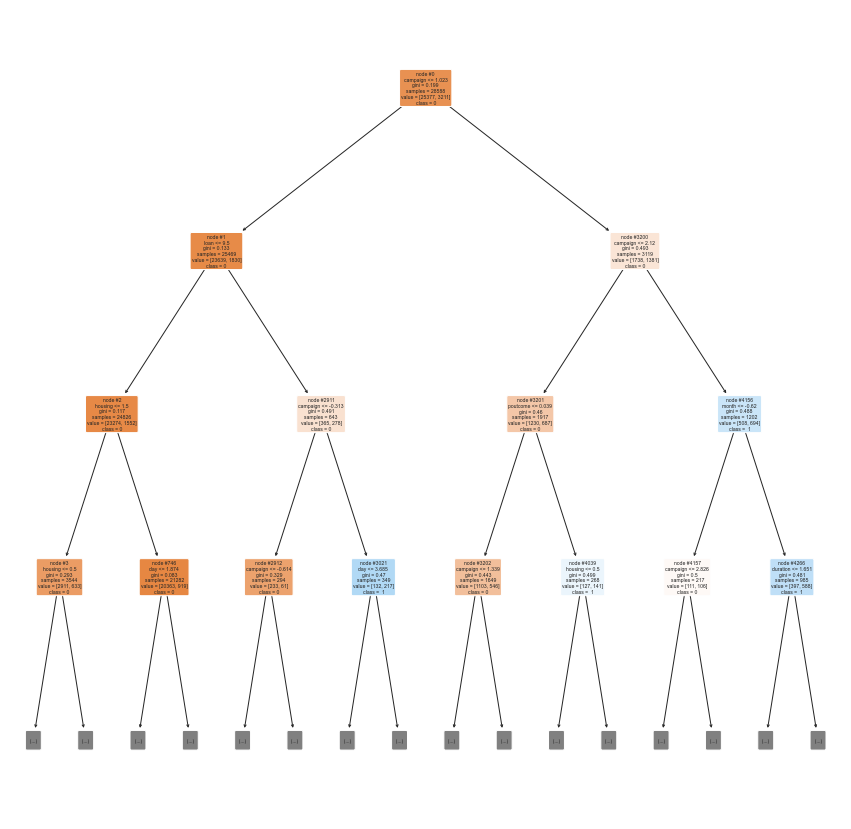

In [77]:
_=plt.figure(figsize=(15,15))
_=plot_tree(
            dt,
            max_depth = 3,  # Draw upto depth of 3
            rounded = True, # Rounded boxes
            filled = True,  # Boxes filled with color
            impurity = True,# Show impurity level
            node_ids = True,# Display node_id
            feature_names = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome'],
            class_names = ['0',' 1']
            )

_=plt.show()

In [78]:
# Random Forest Classifier
from sklearn.model_selection import train_test_split
X= df.drop(['response_binary'], axis=1)
y= df['response_binary']


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [79]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error,r2_score 
from sklearn.preprocessing import OneHotEncoder as onehot
from sklearn.preprocessing import LabelEncoder

In [80]:
le = LabelEncoder()
X_train[cat_atr] = X_train[cat_atr].apply(le.fit_transform)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [82]:
X_train[cat_atr].head()

,job,marital,education,default,housing,loan,poutcome,month
8006,1,1,0,0,1,0,2,6
6900,1,1,1,0,1,1,2,8
19270,3,1,1,0,0,0,2,1
5185,8,1,1,0,0,0,2,8
4791,4,1,2,0,1,0,2,8


In [83]:
ss = StandardScaler()
ss.fit_transform(X_train[num_atr])

array([[-1.03279024, -0.42201272, -1.54203421, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.62526263,  1.59065425, ...,  0.06650842,
        -0.36824873, -0.27816025],
       [-0.07972134, -0.00846378, -0.45764205, ..., -0.25266947,
        -0.36824873, -0.27816025],
       ...,
       [-0.27033512, -0.31627578,  0.86772615, ..., -0.25266947,
        -0.36824873, -0.27816025],
       [ 0.87334756, -0.62232549, -1.06008214, ..., -0.57184736,
        -0.36824873, -0.27816025],
       [ 1.06396134, -0.60998952, -0.93959412, ..., -0.25266947,
         3.66926515,  0.35567087]])

In [84]:
a = X_train[cat_atr]
b = ss.transform(X_train[num_atr])

Xtr = np.hstack([a,b])
Xtr.shape 

(28588, 15)

In [85]:
ss = StandardScaler()
ss.fit_transform(X_test[num_atr])
le = LabelEncoder()
X_test[cat_atr] = X_test[cat_atr].apply(le.fit_transform)
a1 = X_test[cat_atr]
b1 = ss.transform(X_test[num_atr])

Xtr1 = np.hstack([a1,b1]) 
Xtr1.shape 

array([[ 1.75532761, -0.60333254, -1.79967387, ...,  0.41730953,
        -0.36216712, -0.27696495],
       [ 1.27615324,  1.6692781 ,  0.47743515, ..., -0.24162006,
         1.74588719,  1.00535189],
       [-1.31138838, -0.27669877, -1.32028249, ..., -0.57108486,
        -0.36216712, -0.27696495],
       ...,
       [-0.25720475,  0.76369029, -1.79967387, ..., -0.24162006,
        -0.36216712, -0.27696495],
       [-0.4488745 , -0.62925586, -1.08058681, ..., -0.24162006,
         3.4839107 ,  0.36419347],
       [ 0.41363937,  0.79018968,  1.55606574, ..., -0.24162006,
        -0.36216712, -0.27696495]])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


(12253, 15)

In [87]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)

RandomForestClassifier()

In [88]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9074512364318942


In [89]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
metrics.confusion_matrix(y_test, y_pred)

array([[10546,   279],
       [  855,   573]], dtype=int64)

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     10825
           1       0.67      0.40      0.50      1428

    accuracy                           0.91     12253
   macro avg       0.80      0.69      0.73     12253
weighted avg       0.90      0.91      0.90     12253



In [91]:
df.feature_names = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous',
       'poutcome']]
df.target_names = df['response_binary']

C:\Users\kdipu\AppData\Local\Temp/ipykernel_23780/3884853354.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.feature_names = df[['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
C:\Users\kdipu\AppData\Local\Temp/ipykernel_23780/3884853354.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.target_names = df['response_binary']


In [92]:
import pandas as pd
feature_imp = pd.Series(clf.feature_importances_).sort_values(ascending=False)
feature_imp

11    0.296718
9     0.115944
8     0.111531
10    0.094982
7     0.091179
0     0.051275
6     0.046940
13    0.043516
12    0.041459
14    0.024081
2     0.023848
4     0.023670
1     0.022951
5     0.009808
3     0.002098
dtype: float64

In [93]:
list(zip(df.columns, feature_imp))

[('age', 0.29671809478029304),
 ('job', 0.11594357424687683),
 ('marital', 0.11153139692626994),
 ('education', 0.09498208641691505),
 ('default', 0.09117903944951428),
 ('balance', 0.05127532414589637),
 ('housing', 0.0469397775823987),
 ('loan', 0.04351550337448863),
 ('day', 0.04145890334386396),
 ('month', 0.02408137796541273),
 ('duration', 0.023848358618516162),
 ('campaign', 0.023669583333534777),
 ('pdays', 0.022951079134342654),
 ('previous', 0.009807812007823328),
 ('poutcome', 0.0020980886738535967)]

<AxesSubplot:>

Text(0.5, 0, 'Feature Importance Score')

Text(0, 0.5, 'Features')

Text(0.5, 1.0, 'Visualizing Important Features')

No handles with labels found to put in legend.


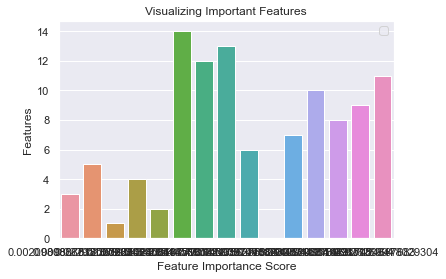

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [95]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(Xtr,y_train)
y_pred=clf.predict(Xtr1)
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

RandomForestClassifier()

Accuracy: 0.9070431731004652


In [96]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     10825
           1       0.68      0.39      0.49      1428

    accuracy                           0.91     12253
   macro avg       0.80      0.68      0.72     12253
weighted avg       0.89      0.91      0.90     12253

